In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10,6
from matplotlib.ticker import StrMethodFormatter
color = sns.color_palette()

In [2]:
#pwd!

In [4]:
data_file=pd.read_csv('take-home_exercise_data.csv')

In [5]:
data_file.head(5)

,Unnamed: 0,prospectid,ordernumber,ordercreatedate,regtenure,customer_type_group,dnatestactivationdayid,daystogetresult_grp,dna_visittrafficsubtype,xsell_gsa,xsell_day_exact
0,1,93771712,127707306,2014-11-28,More than 120 days old,Existing Reg,2014-12-10,4 weeks,NaN,1,38.0
1,2,123112555,114401425,2013-12-05,Order prior to reg,New Reg,2014-01-13,4 weeks,NaN,1,40.0
2,3,171965960,159656050,2016-11-25,Order prior to reg,New Reg,NaN,-1,Paid Search Non Brand,0,NaN
3,4,175522116,165370285,2017-03-08,<=60 days,Existing Reg,NaN,-1,Email Programs,0,NaN
4,5,149288086,132837125,2015-03-30,Order prior to reg,New Reg,2015-04-06,4 weeks,NaN,0,NaN


In [43]:
data_file['ordercreatedate'] = pd.to_datetime(data_file['ordercreatedate'])
data_file['dnatestactivationdayid'] = pd.to_datetime(data_file['dnatestactivationdayid'])


data_file['date_diff'] = (data_file['dnatestactivationdayid'] - data_file['ordercreatedate']).dt.days

In [23]:
data_file[data_file.customer_type_group=='Acom Sub'].count()

prospectid                 81253
ordernumber                81253
ordercreatedate            81253
regtenure                  81253
customer_type_group        81253
dnatestactivationdayid     65308
daystogetresult_grp        81253
dna_visittrafficsubtype    52442
xsell_gsa                  81253
xsell_day_exact             7141
xsell_derived              81253
Cross_sell_customer        81253
order_count                81253
dtype: int64

In [ ]:
data_file[data_file.customer_type_group=='Acom Sub' & data_file.x].count()

In [6]:
# data_file.columns
# data_file.dtypes

In [7]:
data_file=data_file.drop(data_file.columns[0], axis=1)

In [8]:
#data_file['ordercreatedate'] = pd.to_datetime(data_file['ordercreatedate'])
#data_file['dnatestactivationdayid'] = pd.to_datetime(data_file['dnatestactivationdayid'])

In [9]:
# Datatype of each column wrt their description
data_file.dtypes

prospectid                   int64
ordernumber                  int64
ordercreatedate             object
regtenure                   object
customer_type_group         object
dnatestactivationdayid      object
daystogetresult_grp         object
dna_visittrafficsubtype     object
xsell_gsa                    int64
xsell_day_exact            float64
dtype: object

In [10]:
# Total number of customers
data_file['prospectid'].count()

251942

In [11]:
#print(data_file["customer_type_group"].value_counts())

In [12]:
data_file['xsell_derived'] = np.where(data_file['xsell_day_exact']<=120, 'Within 120 days', 'More than 120 days')

In [13]:
data_file["Cross_sell_customer"]=np.where((data_file["xsell_gsa"] == 1) & (data_file["xsell_derived"] == "Within 120 days"),'Yes','No')

In [14]:
gb_prospectid = data_file[['prospectid','ordernumber']].groupby('prospectid').count()

In [15]:
gb_prospectid[gb_prospectid.ordernumber>1].count()

ordernumber    33407
dtype: int64

In [16]:
gb_prospectid.rename(columns={'ordernumber':'order_count'},inplace=True)

In [17]:
gb_prospectid.reset_index(level=0,inplace=True)

In [18]:
data_file = data_file.merge(gb_prospectid,how='left',on='prospectid')

In [19]:
data_file['label_Y_cross_sell'] = data

NameError: name 'data' is not defined

In [20]:
data_file_cnt_dna = data_file.groupby("customer_type_group")["ordernumber"].aggregate(get_unique_count)
data_file_cnt_dna

NameError: name 'get_unique_count' is not defined

In [21]:
data_file.head()

,prospectid,ordernumber,ordercreatedate,regtenure,customer_type_group,dnatestactivationdayid,daystogetresult_grp,dna_visittrafficsubtype,xsell_gsa,xsell_day_exact,xsell_derived,Cross_sell_customer,order_count
0,93771712,127707306,2014-11-28,More than 120 days old,Existing Reg,2014-12-10,4 weeks,NaN,1,38.0,Within 120 days,Yes,1
1,123112555,114401425,2013-12-05,Order prior to reg,New Reg,2014-01-13,4 weeks,NaN,1,40.0,Within 120 days,Yes,2
2,171965960,159656050,2016-11-25,Order prior to reg,New Reg,NaN,-1,Paid Search Non Brand,0,NaN,More than 120 days,No,1
3,175522116,165370285,2017-03-08,<=60 days,Existing Reg,NaN,-1,Email Programs,0,NaN,More than 120 days,No,1
4,149288086,132837125,2015-03-30,Order prior to reg,New Reg,2015-04-06,4 weeks,NaN,0,NaN,More than 120 days,No,1


In [41]:
data_file[data_file.dnatestactivationdayid.isna()].count()

prospectid                 73097
ordernumber                73097
ordercreatedate            73097
regtenure                  73097
customer_type_group        73097
dnatestactivationdayid         0
daystogetresult_grp        73097
dna_visittrafficsubtype    56066
xsell_gsa                  73097
xsell_day_exact             4840
xsell_derived              73097
Cross_sell_customer        73097
order_count                73097
dtype: int64

In [42]:
data_file[(data_file.Cross_sell_customer=='Yes')&(data_file.dnatestactivationdayid.isna())].count()

prospectid                 3886
ordernumber                3886
ordercreatedate            3886
regtenure                  3886
customer_type_group        3886
dnatestactivationdayid        0
daystogetresult_grp        3886
dna_visittrafficsubtype    3060
xsell_gsa                  3886
xsell_day_exact            3886
xsell_derived              3886
Cross_sell_customer        3886
order_count                3886
dtype: int64

In [33]:
data_file[['Cross_sell_customer','ordernumber']].groupby('Cross_sell_customer').count()

,ordernumber
Cross_sell_customer,
No,220726
Yes,31216


In [39]:
data_file[data_file.order_count==3][['Cross_sell_customer','ordernumber']].groupby('Cross_sell_customer').count()

,ordernumber
Cross_sell_customer,
No,15637
Yes,1097


In [29]:
data_file[(data_file.customer_type_group=='Acom Sub') &( data_file.xsell_day_exact<120)].count()

prospectid                 2620
ordernumber                2620
ordercreatedate            2620
regtenure                  2620
customer_type_group        2620
dnatestactivationdayid     2247
daystogetresult_grp        2620
dna_visittrafficsubtype    1680
xsell_gsa                  2620
xsell_day_exact            2620
xsell_derived              2620
Cross_sell_customer        2620
order_count                2620
dtype: int64

In [28]:
data_file[(data_file.customer_type_group=='Acom Sub') &( data_file.xsell_day_exact>120)].count()

prospectid                 4518
ordernumber                4518
ordercreatedate            4518
regtenure                  4518
customer_type_group        4518
dnatestactivationdayid     4190
daystogetresult_grp        4518
dna_visittrafficsubtype    1459
xsell_gsa                  4518
xsell_day_exact            4518
xsell_derived              4518
Cross_sell_customer        4518
order_count                4518
dtype: int64

In [22]:
print(data_file["regtenure"].value_counts())

More than 120 days old    148440
Order prior to reg         80058
<=10 days                   6562
<=60 days                   5156
<=90 days                   3629
<=120 days                  2928
<=20 day                    2384
<=30 days                   1976
No Reg Date                  809
Name: regtenure, dtype: int64


In [13]:
data_file['xsell_day_exact'].describe()

count    40579.000000
mean       140.674043
std        668.588251
min          0.000000
25%          0.000000
50%         22.000000
75%        100.000000
max      42302.000000
Name: xsell_day_exact, dtype: float64

In [ ]:
# info to dna activatation day on cross sell 

In [84]:
data_file = data_file[data_file.date_diff<=100]

In [90]:
data_file['date_diff'].describe()

count    170000.000000
mean         17.015800
std          17.376458
min           1.000000
25%           7.000000
50%          10.000000
75%          19.000000
max         100.000000
Name: date_diff, dtype: float64

In [85]:
data_cross_sell = data_file[(data_file.Cross_sell_customer=='Yes')&(data_file.dnatestactivationdayid.isna()==False)]

In [86]:
data_not_cross_sell = data_file[(data_file.Cross_sell_customer=='No')&(data_file.dnatestactivationdayid.isna()==False)]

In [87]:
data_cross_sell['date_diff'].describe()

count    26500.000000
mean        15.700868
std         16.075302
min          1.000000
25%          7.000000
50%          9.000000
75%         17.000000
max        100.000000
Name: date_diff, dtype: float64

In [88]:
data_not_cross_sell['date_diff'].describe()

count    143500.000000
mean         17.258627
std          17.595532
min           1.000000
25%           7.000000
50%          10.000000
75%          19.000000
max         100.000000
Name: date_diff, dtype: float64

In [57]:
import seaborn as sns

In [61]:
import matplotlib.pyplot as plt


(array([145512.,  17022.,   6188.,   3174.,   1595.,    990.,    716.,
           634.,    445.,    344.]),
 array([  1. ,  30.8,  60.6,  90.4, 120.2, 150. , 179.8, 209.6, 239.4,
        269.2, 299. ]),
 <a list of 10 Patch objects>)

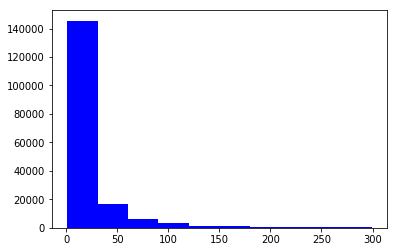

In [67]:
plt.hist(data_file[data_file.date_diff<300]['date_diff'].dropna(),  color = 'blue')

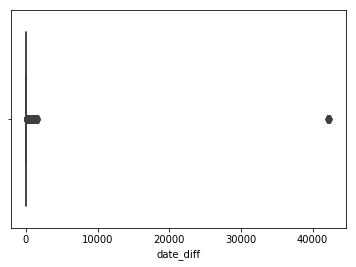

In [75]:
sns.boxplot(data_file['date_diff'].dropna())

In [80]:
data_file[data_file.date_diff>100].count()

prospectid                 8845
ordernumber                8845
ordercreatedate            8845
regtenure                  8845
customer_type_group        8845
dnatestactivationdayid     8845
daystogetresult_grp        8845
dna_visittrafficsubtype    5559
xsell_gsa                  8845
xsell_day_exact            1726
xsell_derived              8845
Cross_sell_customer        8845
order_count                8845
date_diff                  8845
dtype: int64

In [83]:
data_file[data_file.date_diff<0].count()

prospectid                 0
ordernumber                0
ordercreatedate            0
regtenure                  0
customer_type_group        0
dnatestactivationdayid     0
daystogetresult_grp        0
dna_visittrafficsubtype    0
xsell_gsa                  0
xsell_day_exact            0
xsell_derived              0
Cross_sell_customer        0
order_count                0
date_diff                  0
dtype: int64

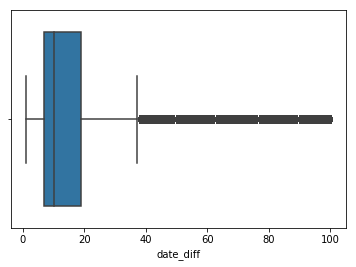

In [81]:
sns.boxplot(data_file[data_file.date_diff<=100]['date_diff'].dropna())

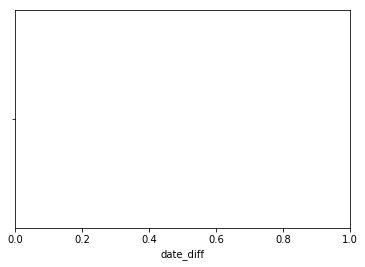

In [82]:
sns.boxplot(data_file[data_file.date_diff<=0]['date_diff'].dropna())

In [72]:
data_file[data_file.date_diff>1000].head(10)

,prospectid,ordernumber,ordercreatedate,regtenure,customer_type_group,dnatestactivationdayid,daystogetresult_grp,dna_visittrafficsubtype,xsell_gsa,xsell_day_exact,xsell_derived,Cross_sell_customer,order_count,date_diff
3029,155297138,140337214,1900-01-01,No Reg Date,New Reg,2015-11-25,5 weeks,NaN,1,42231.0,More than 120 days,No,2,42331.0
4276,84408881,141609021,1900-01-01,No Reg Date,New Reg,2015-12-02,4 weeks,NaN,1,40578.0,More than 120 days,No,2,42338.0
7310,37809830,109625891,2013-07-25,More than 120 days old,Acom Sub,2017-03-11,-1,NaN,0,NaN,More than 120 days,No,1,1325.0
7941,24456464,133526400,1900-01-01,No Reg Date,New Reg,2015-04-25,4 weeks,NaN,1,41485.0,More than 120 days,No,2,42117.0
8945,32468235,111728493,2013-09-22,More than 120 days old,Acom Sub,2016-09-10,4 weeks,NaN,0,NaN,More than 120 days,No,1,1084.0
9741,66348165,99664705,2012-09-02,More than 120 days old,Acom Sub,2016-01-09,-1,NaN,0,NaN,More than 120 days,No,2,1224.0
14283,74572205,98279617,2012-07-18,More than 120 days old,Acom Sub,2016-03-08,-1,NaN,0,NaN,More than 120 days,No,1,1329.0
15262,69435433,107018452,2013-04-29,More than 120 days old,Acom Sub,2017-02-18,-1,NaN,0,NaN,More than 120 days,No,2,1391.0
16920,48996656,102569163,2012-12-09,More than 120 days old,Acom Sub,2016-04-28,5 weeks,NaN,0,NaN,More than 120 days,No,3,1236.0
17557,86412999,103428025,2013-01-06,More than 120 days old,Acom Sub,2017-01-17,-1,NaN,1,1459.0,More than 120 days,No,2,1472.0


In [14]:
##  check any missing or NA or NAN values in columns of data set
data_file.columns[data_file.isnull().any()].tolist()

['dnatestactivationdayid', 'dna_visittrafficsubtype', 'xsell_day_exact']

In [15]:
# filter out the observations which have not activated the product for test
data_file_activation_unknown=data_file[data_file['dnatestactivationdayid'].isnull()]

In [16]:
data_file_activation_unknown["prospectid"].count()

73097

In [17]:
# percentage of customers who havent activated the DNA product after purchase or whose date is not recorded
x=data_file['prospectid'].count()
y=data_file_activation_unknown["prospectid"].count()
prcnt=(y/x)*100
print (prcnt)

29.01342372450802


In [18]:
def get_unique_count(x):
    return len(np.unique(x))

In [19]:
#data_file_activation_unknown_cnt = data_file_activation_unknown.groupby("xsell_day_exact")["xsell_derived"].aggregate(get_unique_count)
#data_file_activation_unknown_cnt

In [20]:
cross_tab = pd.crosstab(index=data_file_activation_unknown["xsell_gsa"], 
                          columns=data_file_activation_unknown["xsell_derived"])
cross_tab

xsell_derived,More than 120 days,Within 120 days
xsell_gsa,,
0,68257,0
1,954,3886


In [21]:
data_file["dna_visittrafficsubtype"] = data_file["dna_visittrafficsubtype"].str.replace(" ‰ÛÒ", "")

In [22]:
data_file['ordercreatedate'] = pd.to_datetime(data_file['ordercreatedate'])
data_file['dnatestactivationdayid'] = pd.to_datetime(data_file['dnatestactivationdayid'])

In [23]:
data_file['date diff'] = data_file['dnatestactivationdayid'] - data_file['ordercreatedate']

In [24]:
#data_file["date diff"] = pd.to_numeric(data_file["date diff"])

In [25]:
#len(data_file[data_file["date diff"] == 'NaT'])

In [ ]:
data_file.hist(column='s')

In [26]:
data_file.head()

,prospectid,ordernumber,ordercreatedate,regtenure,customer_type_group,dnatestactivationdayid,daystogetresult_grp,dna_visittrafficsubtype,xsell_gsa,xsell_day_exact,xsell_derived,date diff
0,93771712,127707306,2014-11-28,More than 120 days old,Existing Reg,2014-10-12,4 weeks,NaN,1,38.0,Within 120 days,-47 days
1,123112555,114401425,2013-05-12,Order prior to reg,New Reg,2014-01-13,4 weeks,NaN,1,40.0,Within 120 days,246 days
2,171965960,159656050,2016-11-25,Order prior to reg,New Reg,NaT,-1,Paid Search Non Brand,0,NaN,More than 120 days,NaT
3,175522116,165370285,2017-08-03,<=60 days,Existing Reg,NaT,-1,Email Programs,0,NaN,More than 120 days,NaT
4,149288086,132837125,2015-03-30,Order prior to reg,New Reg,2015-06-04,4 weeks,NaN,0,NaN,More than 120 days,66 days


In [27]:
sum(pd.isnull(data_file['date diff']))

73097

In [30]:
data_file.dtypes

prospectid                           int64
ordernumber                          int64
ordercreatedate             datetime64[ns]
regtenure                           object
customer_type_group                 object
dnatestactivationdayid      datetime64[ns]
daystogetresult_grp                 object
dna_visittrafficsubtype             object
xsell_gsa                            int64
xsell_day_exact                    float64
xsell_derived                       object
date diff                  timedelta64[ns]
dtype: object

In [ ]:
data_file['year'] = data_file['ordercreatedate'].dt.year
ddata_filef['month'] = data_file['creatordercreatedateed_at_first'].dt.month
data_file['day'] = data_file['ordercreatedate'].dt.day

Description --
        prospectid : unique (customer wise)
        ordernumber : unique (DNA product wise)
        ordercreatedate : DNA product ordered date
        regtenure : email id registered days
        customer_type_group : type of customer of DNA product
        dnatestactivationdayid : DNA test activated date
        daystogetresult_grp : days taken to get results of DNA test
        dna_visittrafficsubtype : DNA product traffic medium/channel
        xsell_gsa : indicates ACOM subscriber
        xsell_day_exact : days b/w DNA product sale & ACOM subscription
        
Checks --
        New Reg = are new registered customers  ==> 